# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math # I don't use this one very often, so I'm curious!

In [2]:
sns.__version__

'0.11.0'

In [3]:
# Read in the data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


The range for coach ticket prices is ($44.415, $593.635).

The mean price is $376.59, and the median price is $380.56.
The mean and median prices are quite similar! There seem to be few major outliers.

$500 seems high for a coach ticket price. The highest price is only $94 more, but the average price is $120 less!


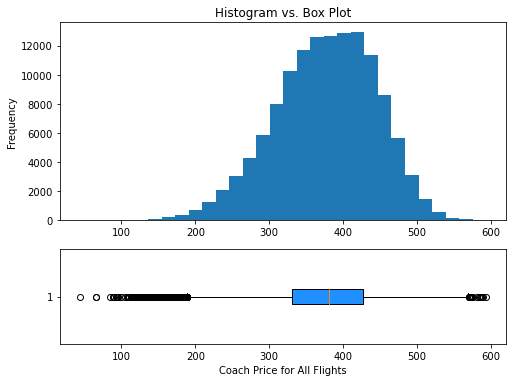

The shape of this distribution is close to normal with a slight tale on the left, toward low prices.


In [4]:
## Task 1: Coach Ticket Prices

# What are the high and low values?
print("The range for coach ticket prices is (${}, ${}).\n"\
      .format(flight.coach_price.min(), flight.coach_price.max()))

# What would be considered the average? 
print("The mean price is ${}, and the median price is ${}."\
      .format(round(flight.coach_price.mean(), 2), flight.coach_price.median()))
print("The mean and median prices are quite similar! There seem to be few major outliers.\n")

# Does $500 seem like a good price for a coach ticket?
print("$500 seems high for a coach ticket price. \
The highest price is only $94 more, but the average price is $120 less!")

# What do coach ticket prices look like?
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211)
ax1.hist(flight.coach_price, bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title("Histogram vs. Box Plot")

ax2 = fig.add_subplot(413)
ax2.boxplot(flight.coach_price, vert=False, patch_artist = True,
           boxprops = dict(facecolor = "dodgerblue"))
ax2.set_xlabel("Coach Price for All Flights")
plt.show()

print("The shape of this distribution is close to normal with a slight tale on the left, toward low prices.")

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

The range for coach ticket prices on 8-hour-long flights is ($170.77, $593.635). The mean price is $431.83, and the median price is $437.115. The mean and median prices are again quite similar. There seem to be few major outliers.

$500 seems more reasonable now. One may alwys try to get a cheaper ticket, but $500 is not far above average.


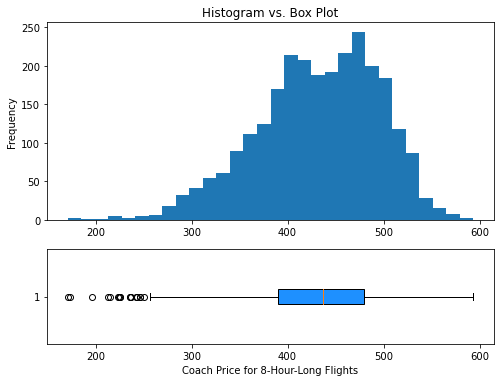

The shape of this distribution is bimodal, with one mode at $400 and another around $475.


In [5]:
## Task 2

# Splice data
eight_hrs = flight[flight.hours == 8]

# What are the high, low, and average prices for 8-hour-long flights? 
print("The range for coach ticket prices on 8-hour-long flights is (${}, ${}). \
The mean price is ${}, and the median price is ${}. \
The mean and median prices are again quite similar. There seem to be few major outliers.\n"\
      .format(eight_hrs.coach_price.min(), eight_hrs.coach_price.max(), \
              round(eight_hrs.coach_price.mean(), 2), eight_hrs.coach_price.median()))

# Does a $500 dollar ticket seem more reasonable than before?
print("$500 seems more reasonable now. \
One may alwys try to get a cheaper ticket, but $500 is not far above average.")

# What does the data look like?
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211)
ax1.hist(eight_hrs.coach_price, bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title("Histogram vs. Box Plot")

ax2 = fig.add_subplot(413)
ax2.boxplot(eight_hrs.coach_price, vert=False, patch_artist = True,
           boxprops = dict(facecolor = "dodgerblue"))
ax2.set_xlabel("Coach Price for 8-Hour-Long Flights")
plt.show()

print("The shape of this distribution is bimodal, with one mode at $400 and another around $475.")

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

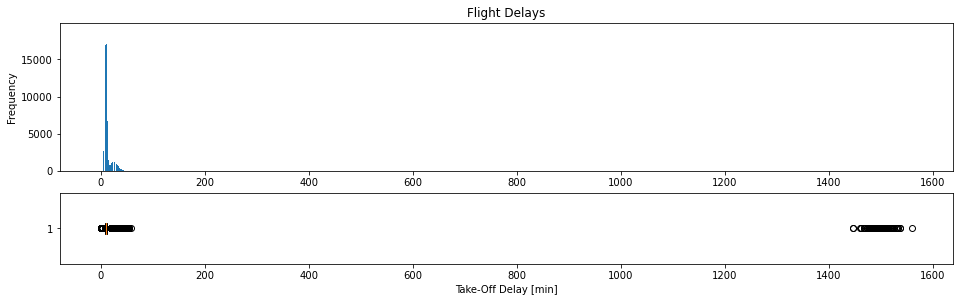

In [6]:
## Task 3

# What does the data look like?
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(211)
ax1.hist(flight.delay, bins=2000)
ax1.set_ylabel("Frequency")
ax1.set_title("Flight Delays")

ax2 = fig.add_subplot(413)
ax2.boxplot(flight.delay, vert=False, patch_artist = True,
           boxprops = dict(facecolor = "dodgerblue"))
ax2.set_xlabel("Take-Off Delay [min]")
plt.show()

The figures above include all the flight delay times in our dataset. From the histogram we see that the majority of delays hover around zero (there's an interesting twofold distribution!) with a massive tale on the right that reaches as far as ~1600 minutes. From the box plot we see that this tale isn't well-populated throughout. Rather, there's a cluster of points between 1400 and 1600 minutes. Let's look at the two ends of the data in individual histograms.

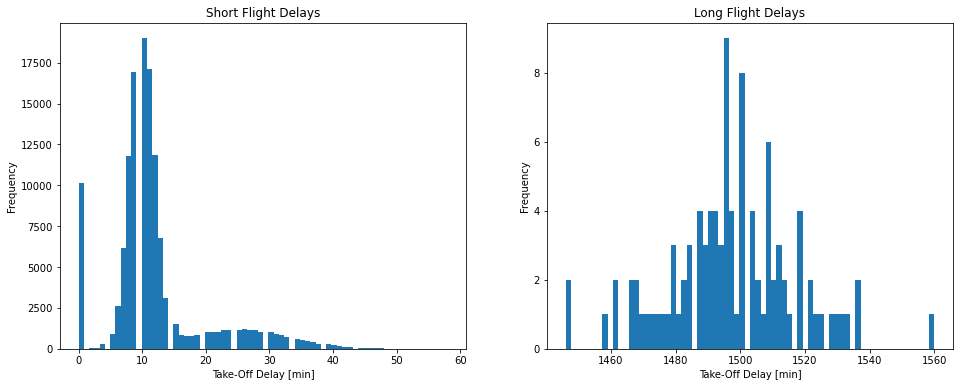

In [7]:
# Isolating the two ends of the data
a = 100 # Upper bound for short delays
b = 1400 # Lower bound for long delays

short_delays = flight[flight.delay <= a]
long_delays = flight[flight.delay >= b]

fig = plt.figure(figsize=(16,6))

n_bins = 70 # Number of bins
ax1 = fig.add_subplot(121)
ax1.hist(short_delays.delay, bins = n_bins)
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Take-Off Delay [min]")
ax1.set_title("Short Flight Delays")

ax2 = fig.add_subplot(122)
ax2.hist(long_delays.delay, bins = n_bins)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Take-Off Delay [min]")
ax2.set_title("Long Flight Delays")

plt.show()

The left-hand plot shows that the large majority of delays are about 10 minutes, with another local maximum at 0 minutes. The right-hand plot adds that among long delays, the majority are about 1500 minutes (25 hours) long. That said, the frequency of long delays is significantly less than short delay times.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

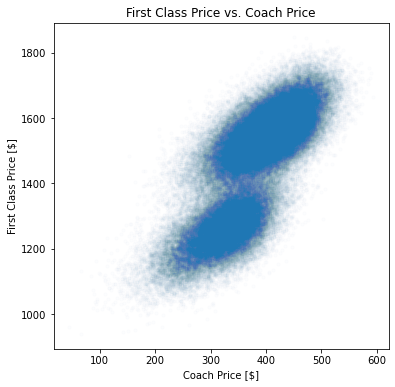

In [8]:
## Task 4

plt.figure(figsize=(6,6))
plt.scatter(flight.coach_price, flight.firstclass_price, s=10, alpha=0.01)
plt.title("First Class Price vs. Coach Price")
plt.ylabel("First Class Price [$]")
plt.xlabel("Coach Price [$]")
plt.show()

It appears that flights with a higher coach price always have higher first-class prices as well. However, the data forms two distinct clusters. I'm curious about what third variable, if any, distinguishes these two clusters. Let's find out.

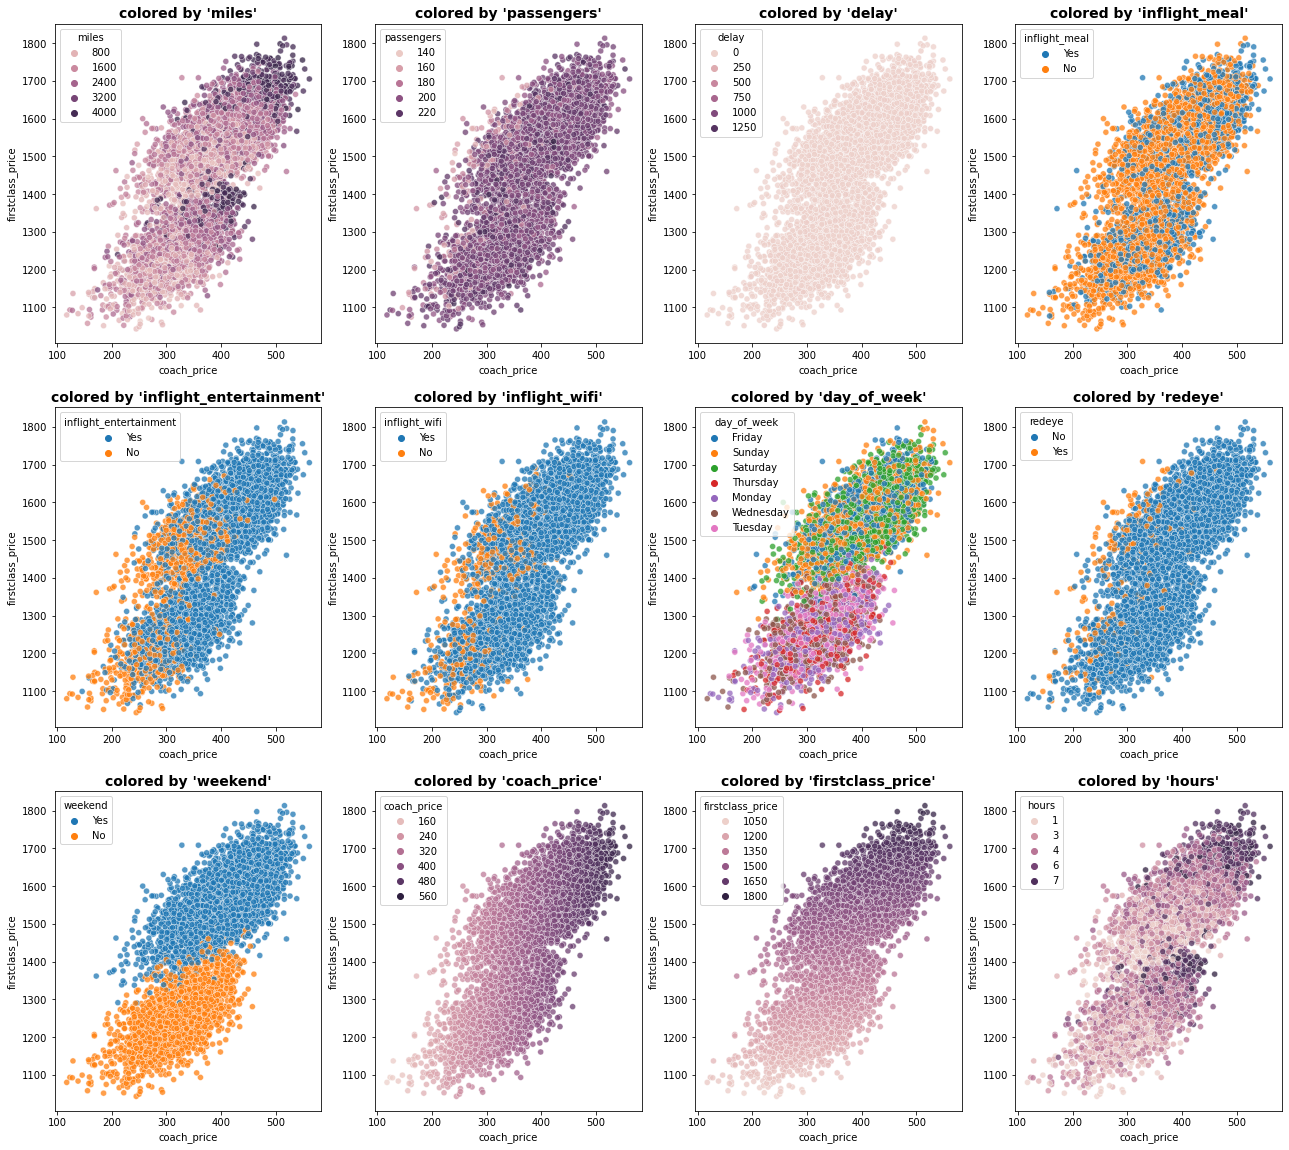

In [9]:
# What third variable differentiates the two clusters?

plt.figure(figsize=(22,20))

columns = list(flight.columns)
flight_sample = flight.sample(n=int(flight.shape[0] * 0.05))

for column in columns:
    plt.subplot(3, 4, columns.index(column)+1)
    sns.scatterplot(x='coach_price', y='firstclass_price', hue=column, data=flight_sample, alpha=0.75)
    plt.title("colored by '{}'".format(column), fontsize=14, fontweight=550)

plt.show()

The distinguishing factor between our clusters is **day of the week / weekend**! All weekend flights (Friday-Sunday) have significantly higher prices than weekday flights. This figure also shows that redeye flights are generally cheaper and flights with inflight entertainment / wifi are generally more expensive.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

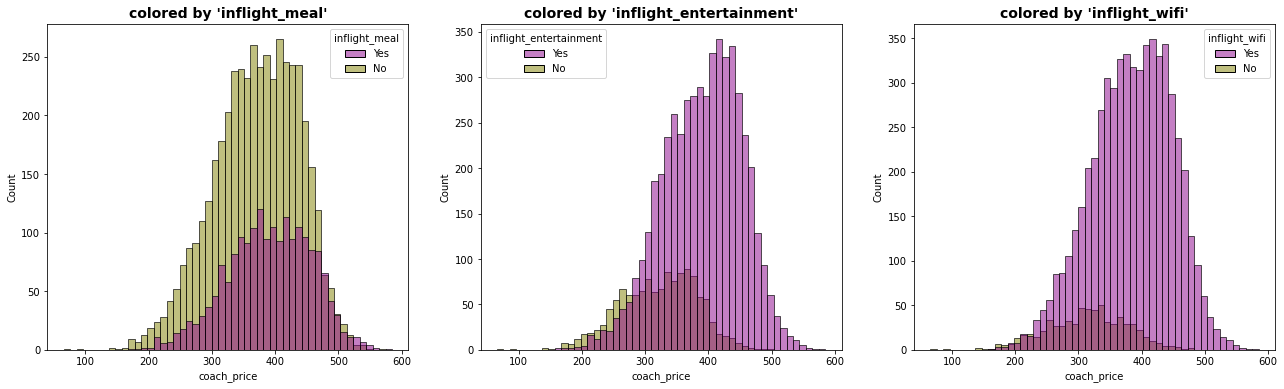

In [26]:
## Task 5

features = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']

plt.figure(figsize=(22,6))

flight_sample = flight.sample(n=int(flight.shape[0] * 0.05))
palette ={"Yes": "darkmagenta", "No": "olive"}

for feature in features:
    plt.subplot(1, 3, features.index(feature)+1)
    sns.histplot(data=flight_sample, x="coach_price", \
                 hue=feature, hue_order = ['Yes', 'No'], palette=palette, alpha=0.5)
    plt.title("colored by '{}'".format(feature), fontsize=14, fontweight=550)

plt.show()

The features associated with the highest increase in price are `inflight_entertainment` and `inflight_wifi`. Both exhibit a definitive increase in median price for flights with these features. While we do see an increase in price for flights with an `inflight_meal`, the increase is not as drastic.

6. How does the number of passengers change in relation to the length of flights?

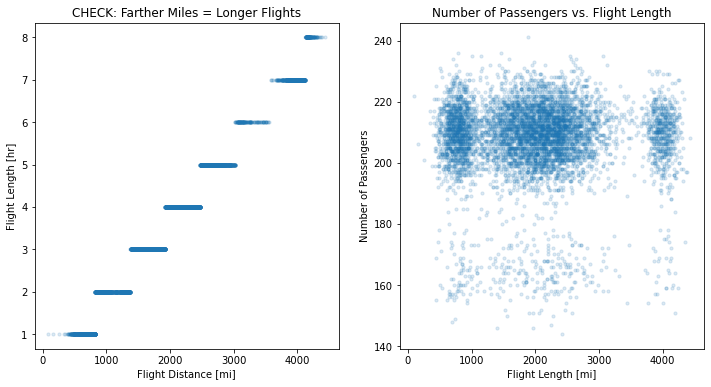

In [51]:
## Task 6

flight_sample = flight.sample(n=int(flight.shape[0] * 0.05))

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.scatter(flight_sample.miles, flight_sample.hours, s=10, alpha=0.15)
ax1.set_xlabel("Flight Distance [mi]")
ax1.set_ylabel("Flight Length [hr]")
ax1.set_title("CHECK: Farther Miles = Longer Flights")

ax2 = fig.add_subplot(122)
ax2.scatter(flight_sample.miles, flight_sample.passengers, s=10, alpha=0.15)
ax2.set_xlabel("Flight Length [mi]")
ax2.set_ylabel("Number of Passengers")
ax2.set_title("Number of Passengers vs. Flight Length")

plt.show()

There is very little correlation between the number of passengers and the length of flights. Of course, there are fewer planes which depart for extremely far distances (e.g., a small cloud of points associated with long flights in the ride-hand plot), but the passenger capacity of the planes remains consistent.

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

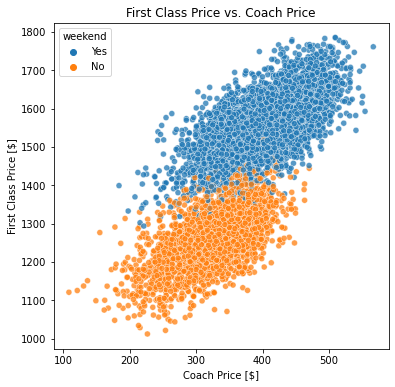

In [55]:
## Task 7
# Great news! We already did this :)

plt.figure(figsize=(6,6))
sns.scatterplot(x='coach_price', y='firstclass_price', \
                hue='weekend', hue_order=['Yes', 'No'], data=flight_sample, alpha=0.75)
plt.title("First Class Price vs. Coach Price")
plt.ylabel("First Class Price [$]")
plt.xlabel("Coach Price [$]")
plt.show()

As above, all weekend flights have significantly higher prices than weekday flights. 

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

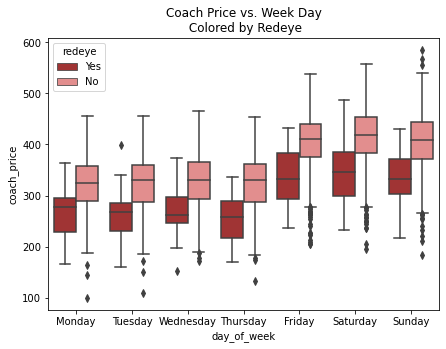

In [83]:
## Task 8

flight_sample = flight.sample(n=int(flight.shape[0] * 0.05))

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
flight_sample['day_of_week'] = pd.Categorical(flight_sample['day_of_week'], categories=cats, ordered=True)
flight_sample = flight_sample.sort_values('day_of_week')

palette ={"Yes": "firebrick", "No": "lightcoral"}

plt.figure(figsize=(7,5))
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", \
            hue_order=['Yes', 'No'], palette = palette, data = flight_sample)
plt.title("Coach Price vs. Week Day\n Colored by Redeye")

plt.show()

Coach prices for redeyes are consistently lower than non-redeye coach prices throughout the week. However, there are no notable discounts for redeye flights on any particular day of the week.